In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from collections import defaultdict
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from collections import Counter

# Taller de Procesamiento de Señales, TP4 2C25 - Análisis de Discriminante y Vecinos más Cercanos
## Amalia Ochoa 107129

---
#####

---




*(a) Exploración de datos:*
1.  Cargar el archivo MulticlassDiabetesDataset.csv. La variable “Class” representa el verdadero diagnóstico (la clase 0 significa Normal, la 1 Prediabetes y la 2 Diabetes). Será la variable a clasificar en esta tarea.
2.   La base de datos utilizada está basada en https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset. Leer la documentación para interpretar correctamente las variables
 3. Reportar la cantidad de muestras por clase.
 4. Utilice un pairplot (seaborn). Explicar que significa dicho gráfico. Justifique por que la característica HbA1c es clave en la clasificación.
 5. Utilice el comando train_test_split (sklearn) para definir dos conjuntos de datos. El conjunto de entrenamiento debe contener el 80% de las muestras, el resto serán de testeo.

 ---

 Con respecto al item (a), se importa el dataset para el procesamiento del mismo y se generan subgrupos de muestras tal que el 80% del dataset se va a utilizar para el entrenamiento del modelo y 20% para la validación. A la función que realiza esta asignación se le pasan dos parámetros: *random_state*, para asegurar repetitibilidad entre los connjuntos elegidos (mismo concepto que una semilla) y *stratify*, el cual asegura que se preserva la frecuencia relativa entre clases del subset sea representativa del set completo.

 Se grafica las relaciones entre pares de variables con *pairplot* para todas las combinaciones de variables numéricas del dataset. En las diagonales se visualizan las distribuciones univariadas de cada variable. Además se nombraron las clases [0,1,2] de forma acorde para facilitar la interpretación.

 Como la diabetes se refiere a la enfermedad en la que los niveles de glucosa en sangre son demasiado elevados, la variable HbA1c (hemoglobina glicosilada) es crucial en la clasificación porque es un estudio que refleja el promedio de glucosa en sangre durante los últimos 2-3 meses. Niveles elevados de HbA1c son indicativos de prediabetes o diabetes, lo que la convierte en una característica clave para la clasificación. Según la información del data set, entendiendo que el resultado del estudio se da en porcentaje:
 * Un nivel de HbA1c normal es menor al 5,7%.
 * La prediabetes se ubica entre 5,7 a 6,4%.
 * La diabetes se ubica por encima del 6,5%

 Esta información se puede obtener también de pairplot para HbA1c contra el resto de las variables, donde se ve claramente los umbrales detallados, especialmente si se observa la información de los gráficos donde HbA1c está en el eje y.

Cantidad de muestras por clase:
Class
2    128
0     96
1     40
Name: count, dtype: int64


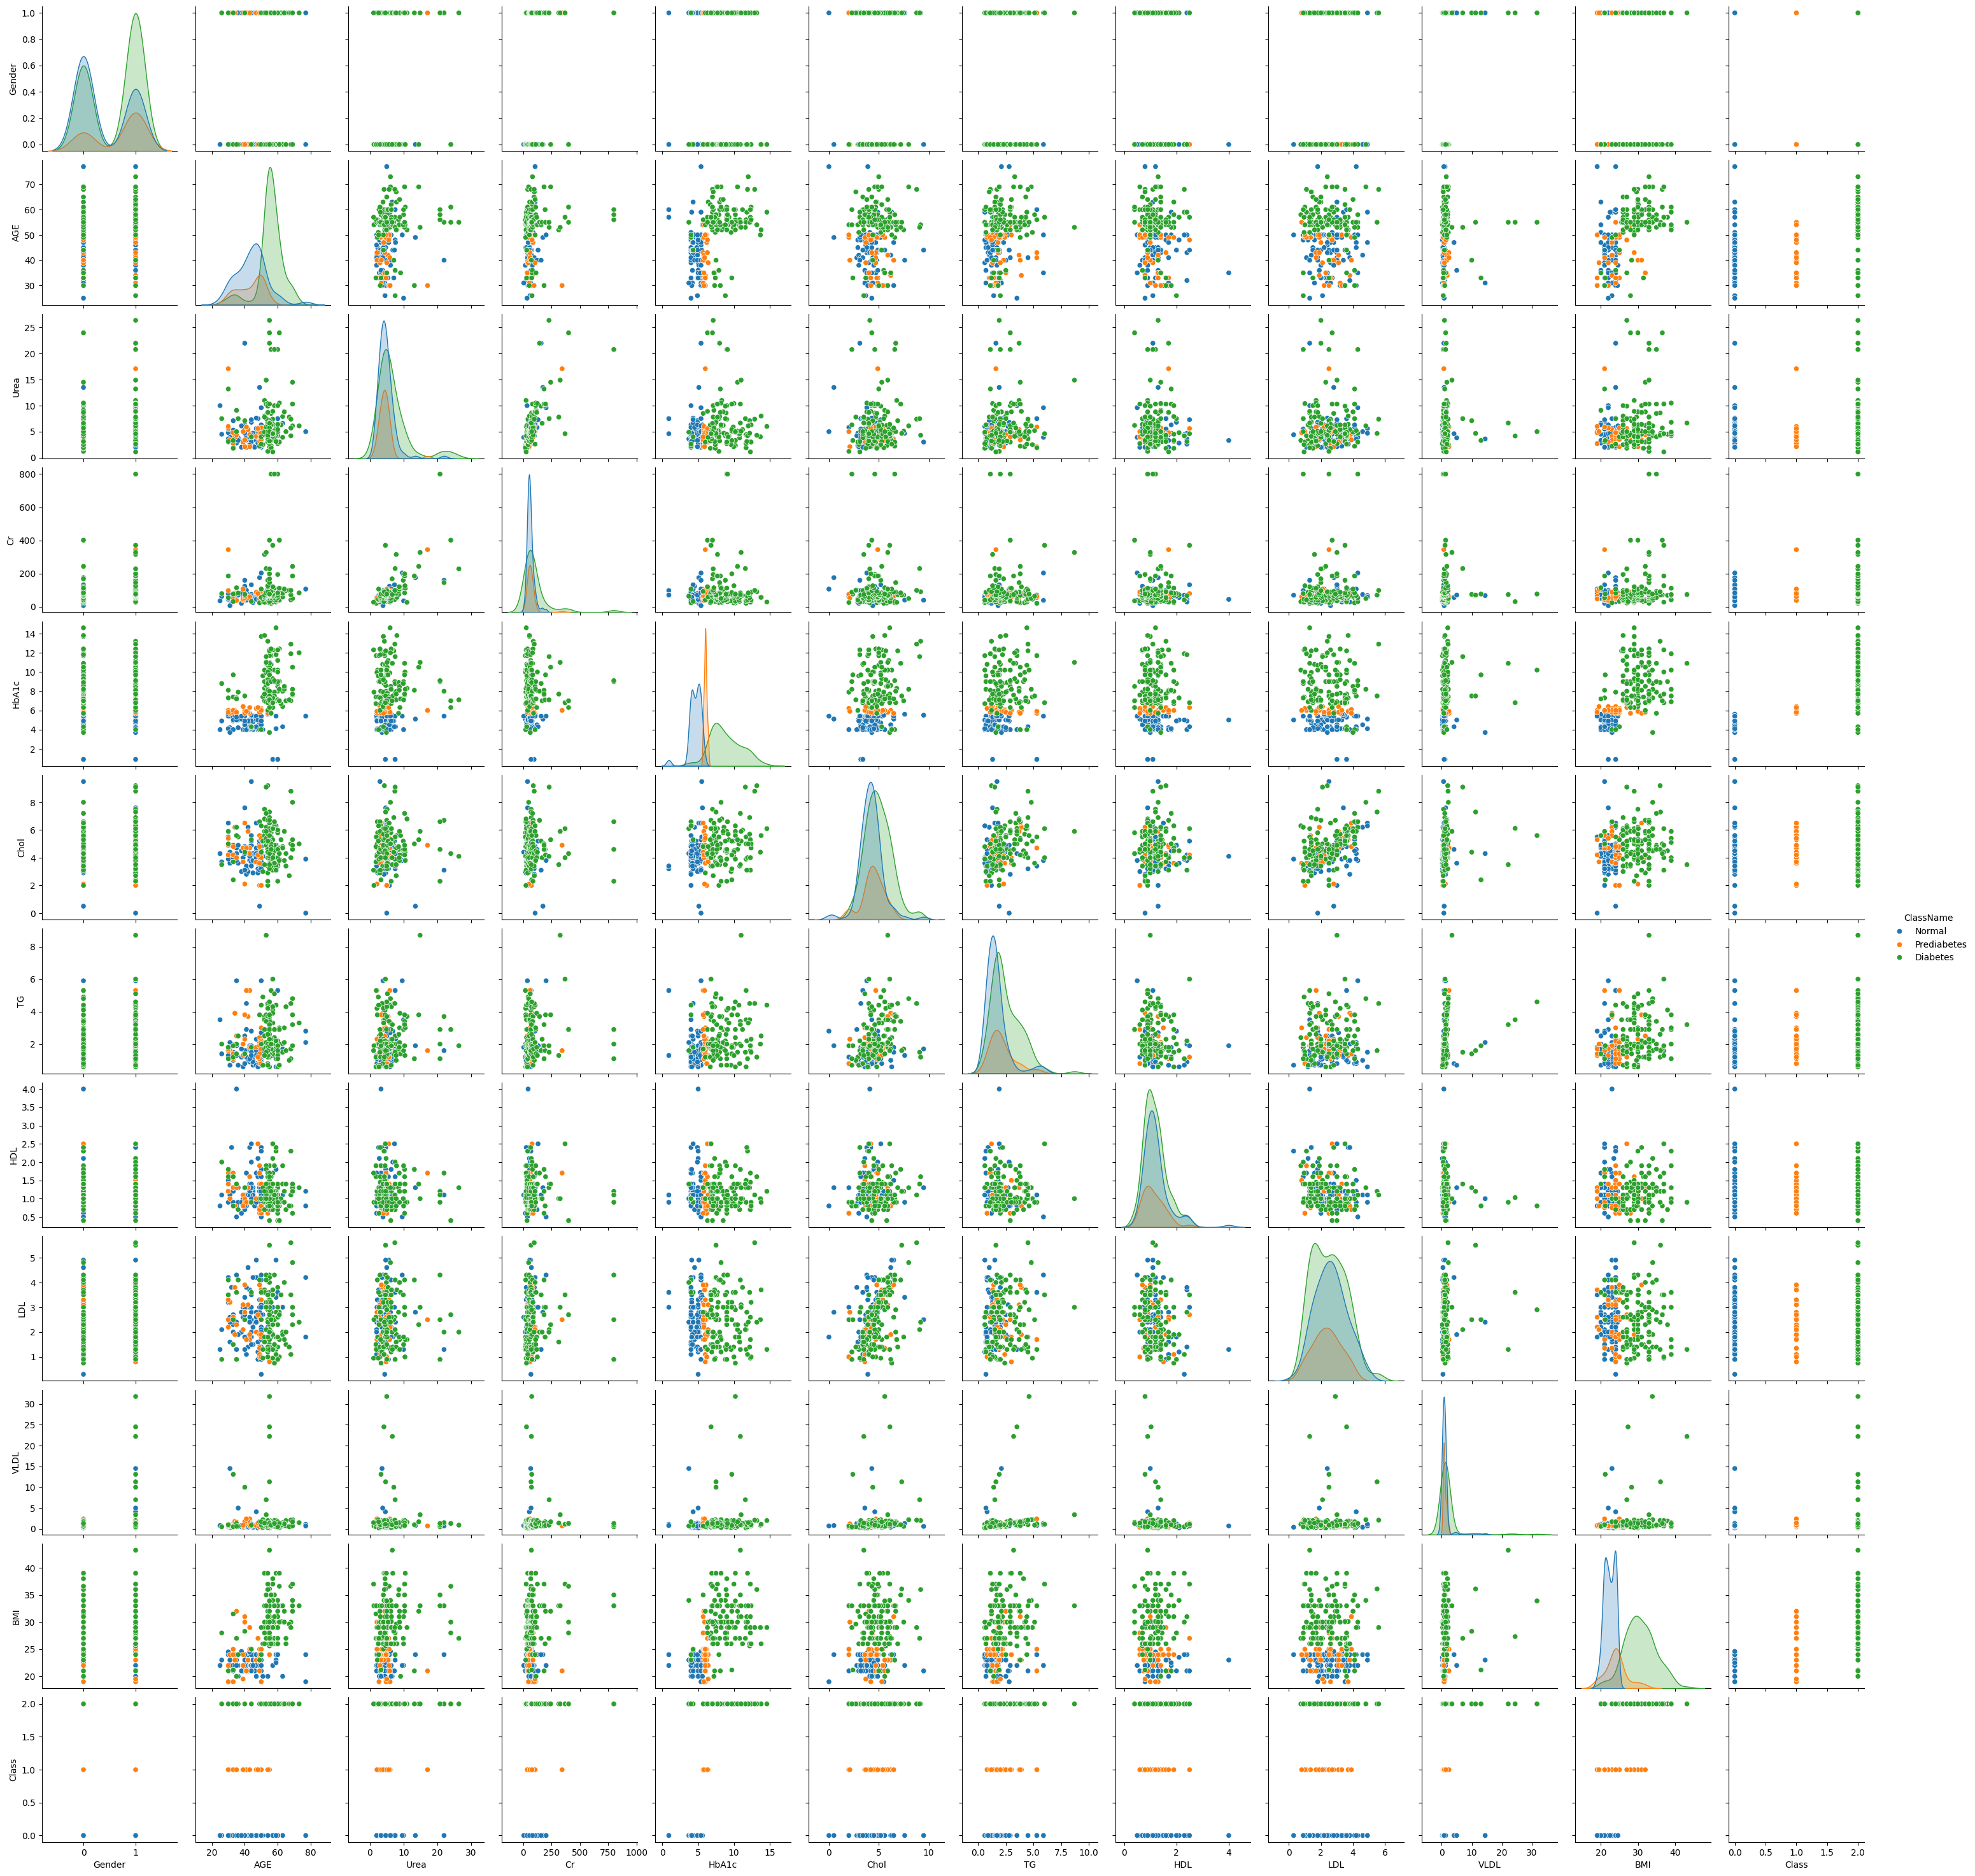

Tamaño del conjunto de entrenamiento: 211 muestras, % : 79.9
Tamaño del conjunto de prueba: 53 muestras, % 20.1


In [ ]:
# 1. importar datos

url = 'https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/refs/heads/main/data/MulticlassDiabetesDataset.csv'
diabetesDataSet = pd.read_csv(url)

# Ver las primeras filas para inspeccionar la estructura
# class la variable a clasificar en esta tarea, [0,1,2], normal, prediabetes, diabetes
diabetesDataSet.head()

# 3. cantidad de muestras por clase
class_qty = diabetesDataSet['Class'].value_counts()
print("Cantidad de muestras por clase:")
print(class_qty)

# nombro las clases para facilitar la interpretación
diabetesDataSet['ClassName'] = diabetesDataSet['Class'].map({0: 'Normal', 1: 'Prediabetes', 2: 'Diabetes'})

# 4. pairplot para visualizar relaciones entre variables
sns.pairplot(diabetesDataSet, hue='ClassName', diag_kind='kde') #lo comento porque sino trad 20 años en ejecutar
plt.show()

# 5. definir variables predictoras (X) y variable objetivo (y)
X = diabetesDataSet.drop(['Class', 'ClassName'], axis=1)
y = diabetesDataSet['Class']

# divido los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)


# tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras, % : {round(X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]), 3  )*100}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras, % {round(X_test.shape[0]/(X_train.shape[0] + X_test.shape[0]), 3)*100}")

(b) Análisis del discriminante:
1.  Implementar una clase LDA_QDA, que funcione para cualquier cantidad de características. El código debe estar estructurdo de la siguiente manera:

```
class LDA_QDA:
   # Inicializar atributos y declarar hiperparámetros
  def __init__(self,...,LDA=False): #LDA selecciona entre LDA y QDA.

  #Etapa de entrenamiento
  def fit(self,X, y):

  #Etapa de testeo hard
  def predict(self,X):

  #Etapa de testeo soft
  def predict_prob(self,X):

  #Alternativa práctica para el testeo soft
  def predict_discriminant(self,X)
 ```

2. Entrenar un clasificador LDA utilizando solamente la característica HbA1c. Repetir para un clasificador QDA.

3. Para cada algoritmo graficar la función discriminante para cada clase e indicar las fronteras de decisión. Comparar resultados.

4. Reportar accuracy, matriz de confusión y macro-F1 utilizando los datos de testeo. ¿Por qué dan tan diferentes el accuracy y la F1?

5. Repetir los incisos 2., 3. y 4. incorporando el BMI como característica. c: Para el análisis gráfico se recomienda utilizar curvas de nivel.

6.  Repetir los incisos 2. y 4 utilizando todas las características.


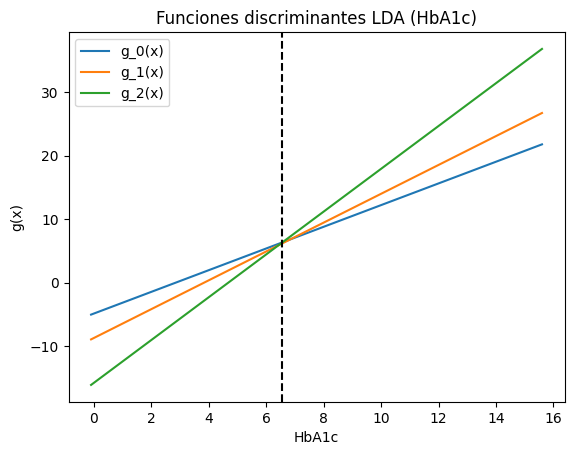

Fronteras de decisión encontradas:
x = 6.559


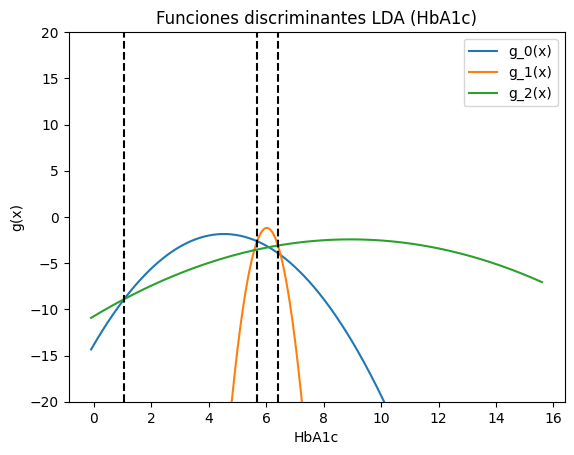

Fronteras de decisión encontradas:
x = 1.049
x = 5.678
x = 6.414
LDA Accuracy: 0.83
LDA Confusion matrix:
 [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.03846154 0.         0.96153846]]
LDA Macro-F1: 0.596
QDA Accuracy: 0.981
QDA Confusion matrix:
 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.03846154 0.         0.96153846]]
QDA Macro-F1: 0.985


In [ ]:
#1. implemento la clase LDA_QDA
class LDA_QDA:
    def __init__(self, LDA=False):
        self.LDA = LDA  # True -> LDA, False -> QDA
        self.classes_ = None
        self.priors_ = None
        self.means_ = None
        self.cov_ = None
        self.covs_ = None  # Para QDA

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        self.means_ = {}
        self.priors_ = {}

        if self.LDA:
            # LDA: covarianza compartida
            self.cov_ = np.zeros((n_features, n_features))

        else:
            # QDA: covarianza por clase
            self.covs_ = {}

        for c in self.classes_:
            X_c = X[y == c]
            self.means_[c] = X_c.mean(axis=0)
            self.priors_[c] = X_c.shape[0] / X.shape[0]

            if self.LDA:
                self.cov_ += np.atleast_2d(np.cov(X_c, rowvar=False)) * (X_c.shape[0] - 1)
            else:
                self.covs_[c] = np.atleast_2d(np.cov(X_c, rowvar=False))
        if self.LDA:
            self.cov_ /= (X.shape[0] - len(self.classes_))  # covarianza compartida

    def predict_prob(self, X):
        probs = np.zeros((X.shape[0], len(self.classes_)))
        # Ensure self.classes_ is a numpy array for consistent indexing
        classes_array = np.array(self.classes_)
        for c in classes_array:
            idx = np.where(classes_array == c)[0][0] # Get the index of the current class
            mean = self.means_[c]
            if self.LDA:
                cov = self.cov_
            else:
                cov = self.covs_[c]
            # Add small value to diagonal of covariance matrix to prevent singularity
            cov = np.atleast_2d(cov)
            cov = cov + np.eye(cov.shape[0]) * 1e-6
            rv = multivariate_normal(mean, cov)
            probs[:, idx] = rv.pdf(X) * self.priors_[c]
        # normalizo
        probs /= probs.sum(axis=1, keepdims=True)
        return probs

    def predict(self, X):
        probs = self.predict_prob(X)
        return np.array([self.classes_[i] for i in np.argmax(probs, axis=1)])

    def predict_discriminant(self, X):
        discr = np.zeros((X.shape[0], len(self.classes_)))
        classes_array = np.array(self.classes_)

        for c in classes_array:
            idx = np.where(classes_array == c)[0][0]
            mean = self.means_[c]

            if self.LDA:
                # LDA lineal
                cov = self.cov_ + np.eye(self.cov_.shape[0]) * 1e-6
                inv_cov = np.linalg.inv(cov)

                w = inv_cov @ mean
                w0 = -0.5 * mean.T @ inv_cov @ mean + np.log(self.priors_[c])

                discr[:, idx] = X @ w + w0

            else:
                # QDA cuadrático
                cov = self.covs_[c] + np.eye(self.covs_[c].shape[0]) * 1e-6
                rv = multivariate_normal(mean, cov)
                discr[:, idx] = rv.logpdf(X) + np.log(self.priors_[c])

        return discr

#funcion para ver la frontera de decision
def decision_boundaries(model, x_min, x_max, num_points=1000):

    X_range = np.linspace(x_min, x_max, num_points).reshape(-1, 1)
    discr = model.predict_discriminant(X_range)

    # clase predicha en cada punto
    preds = np.argmax(discr, axis=1)

    # busco cambios de clase consecutivos
    boundaries = []
    for i in range(1, len(preds)):
        if preds[i] != preds[i-1]:
            # aproximo la frontera como el punto medio
            boundary = (X_range[i] + X_range[i-1]) / 2
            boundaries.append(boundary.item())

    return boundaries


#2. entreno el clasificador solo con la columna HbA1c, ajusto las filas de y
X_hba1c_train = X_train[['HbA1c']].values
y_train_array = y_train.values

# entrenamiento LDA
lda = LDA_QDA(LDA=True)
lda.fit(X_hba1c_train, y_train_array)
y_pred_lda_train = lda.predict(X_hba1c_train)

# entrenamiento QDA
qda = LDA_QDA(LDA=False)
qda.fit(X_hba1c_train, y_train_array)
y_pred_qda_train = qda.predict(X_hba1c_train)


#3. grafico la función discriminante y frontera de decisión
x_vals = np.linspace(X_hba1c_train.min()-1, X_hba1c_train.max()+1, 500).reshape(-1, 1)

# LDA: Linear Discriminant Analysis
discr_lda = lda.predict_discriminant(x_vals)
plt.figure()
for i, c in enumerate(lda.classes_):
    plt.plot(x_vals, discr_lda[:, i], label=f'g_{c}(x)')

boundaries_lda = decision_boundaries(lda, x_min=0, x_max=16)
# fronteras = puntos donde dos discriminantes se cruzan
for b in boundaries_lda:
    plt.axvline(x=b, color='k', linestyle='--')

plt.title("Funciones discriminantes LDA (HbA1c)")
plt.xlabel("HbA1c")
plt.ylabel("g(x)")
plt.legend()
plt.show()

print("Fronteras de decisión encontradas:")
for b in boundaries_lda:
    print(f"x = {b:.3f}")

# QDA: Quadratic Discriminant Analysis
discr_qda = qda.predict_discriminant(x_vals)
plt.figure()
for i, c in enumerate(qda.classes_):
    plt.plot(x_vals, discr_qda[:, i], label=f'g_{c}(x)')

boundaries_qda = decision_boundaries(qda, x_min=0, x_max=16)
# fronteras = puntos donde dos discriminantes se cruzan
for b in boundaries_qda:
    plt.axvline(x=b, color='k', linestyle='--')

plt.title("Funciones discriminantes LDA (HbA1c)")
plt.xlabel("HbA1c")
plt.ylabel("g(x)")
plt.ylim(bottom=-20)
plt.ylim(top = 20)
plt.legend()
plt.show()

boundaries = decision_boundaries(qda, x_min=0, x_max=16)

print("Fronteras de decisión encontradas:")
for b in boundaries:
    print(f"x = {b:.3f}")

#4. métricas
X_hba1c_test = X_test[['HbA1c']].values
y_test_array = y_test.values

print("LDA Accuracy:", round(accuracy_score(y_test_array, lda.predict(X_hba1c_test)),3))
print("LDA Confusion matrix:\n", confusion_matrix(y_test_array, lda.predict(X_hba1c_test), normalize = "true"))
print("LDA Macro-F1:", round(f1_score(y_test_array, lda.predict(X_hba1c_test), average='macro'),3))

print("QDA Accuracy:", round(accuracy_score(y_test_array, qda.predict(X_hba1c_test)),3))
print("QDA Confusion matrix:\n", confusion_matrix(y_test_array, qda.predict(X_hba1c_test), normalize = "true"))
print("QDA Macro-F1:", round(f1_score(y_test_array, qda.predict(X_hba1c_test), average='macro'),3))



Resepcto a los gráficos:
* para el primer grafico se entiende que la linea vertical es la frontera de decisión entre clase 0 y clase 2. "la mas alta" es la que mas confianza tiene en esa zona, asi que antes de la frontera de decisión vemos que se rpedeciría la clase 0 y despues de la frontera la clase 2.
* para el segundo gráfico se entiende que la primera región corresponde a la clase 0, la region pequeña del medio a la clase 1 y la tercera y última región a la clase 2. Entonces se tienen las fronteras de decisión entre clase 0-clase 1 y clase 1-clase 2. lo mismo, la que tenga mas altura es la que mas confianza tiene en predecir su clase entonces así se definen las reciones.
* ambos gráficos son planos porque solo se tiene en cuenta una categoría.

en LDA se asume que todas las clases comparten la misma matriz de covarianza, entonces las funcinoes discriminantes son lineales: Hay un único punto de corte entre clases para la frontera de decisión.
en QDA, cada clase tiene su matriz de covarianza, lo que permite funciones discriminantes cuadráticas y cada clase queda encerrada entre dos fronteras de decisión.

¿Por qué dan tan diferentes el accuracy y la F1? Del Tp anterior sabemos que accuracy mide la proporción total de aciertos.
Si las clases están desbalanceadas, un clasificador podría predecir siempre una clase y predecir con un alto accuracy (para esa clase mayoritaria) pero ignoraría la clase minoritaría, no predeciría nunca la clase minoritara.

La macro F1 promedia las F1-score de cada clase, dándoles el mismo peso, por lo que penaliza el modelo si clasifica mal a la clase minoritaria (una clase tiene bajo F1-score). Llamamos F1-score a una métrica que tiene en cuenta el recall y la precisión y mide el desempeño del aprendizaje de un algoritmos en conjuntos de datos desbalanceados.

Si hay desbalanceo en el algoritmo, habrá un alto accuracy pero un Macro F1 bajo. Entonces podemos ver que para LDA se penaliza que prediga siempre mal la clase 1, se ve también en el gráfico que al tener una única frontera lineal, no logra separar a clase 1 y la "suma" a la clase 0. Viendo a las matrices de confusión (sin normalizar) se puede ver también este problema del LDA en comparación con QDA.

Con respecto a las fronteras de decisión, la QDA predice muy bien en realción a la información de las clases (Clase 0 menor a 5,7%, clase 1 entre 5,7 a 6,4% y clase 2 por encima del 6,5%) lo que sugiere un buen predictor para las 3 clases. Con respecto al LDA es muy útil para detectar diabetes, pero no distingue valores normales de pre diabetes.

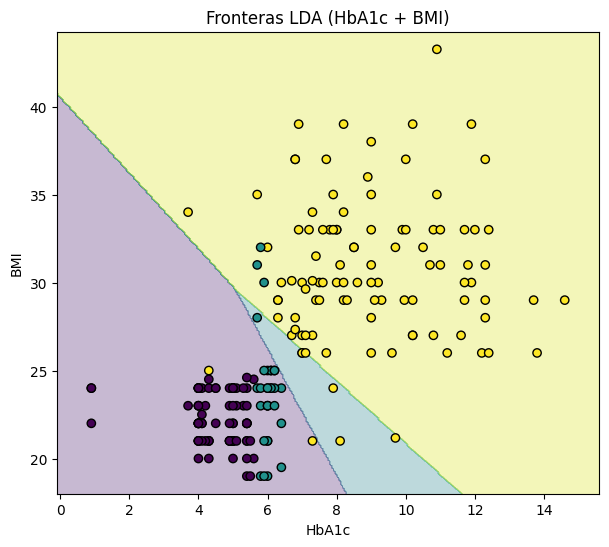

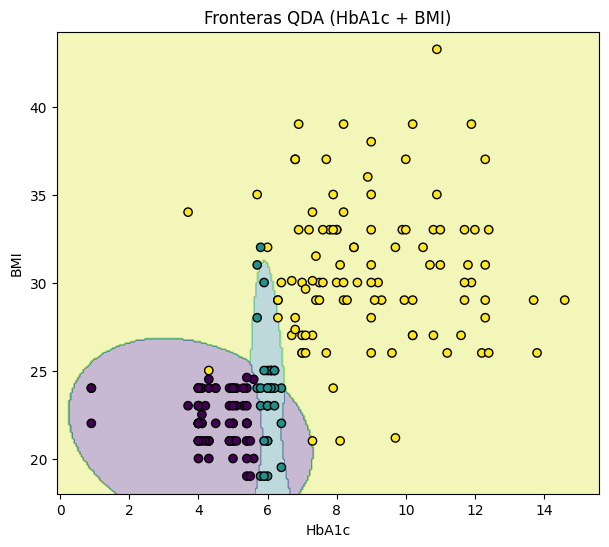

LDA (HbA1c + BMI)
Accuracy: 0.83
Confusion matrix:
 [[19  0  0]
 [ 7  1  0]
 [ 2  0 24]]
Macro-F1: 0.664

QDA (HbA1c + BMI)
Accuracy: 0.962
Confusion matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 2  0 24]]
Macro-F1: 0.97


In [ ]:
#5. Vuelvo a hacer todo sumando BMI como característica

#5.2. entreno el clasificador con la columna HbA1c y BMI, ajusto las filas de y
X_2d_train = X_train[['HbA1c', 'BMI']].values
X_2d_test  = X_test[['HbA1c', 'BMI']].values
y_train_array = y_train.values
y_test_array  = y_test.values

# LDA
lda2d = LDA_QDA(LDA=True)
lda2d.fit(X_2d_train, y_train_array)

# QDA
qda2d = LDA_QDA(LDA=False)
qda2d.fit(X_2d_train, y_train_array)


#5.3. grafico la función discriminante y frontera de decisión. Se recomuenda curvas de nivel
x_min, x_max = X_2d_train[:, 0].min() - 1, X_2d_train[:, 0].max() + 1
y_min, y_max = X_2d_train[:, 1].min() - 1, X_2d_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# LDA
probs_lda_2d = lda2d.predict_prob(grid)
Z_lda_2d = np.argmax(probs_lda_2d, axis=1).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z_lda_2d, alpha=0.3, cmap='viridis')
plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1], c=y_train_array, cmap='viridis', edgecolor='k')
plt.title("Fronteras LDA (HbA1c + BMI)")
plt.xlabel("HbA1c")
plt.ylabel("BMI")
plt.show()

# QDA
probs_qda_2d = qda2d.predict_prob(grid)
Z_qda_2d = np.argmax(probs_qda_2d, axis=1).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z_qda_2d, alpha=0.3, cmap='viridis')
plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1], c=y_train_array, cmap='viridis', edgecolor='k')
plt.title("Fronteras QDA (HbA1c + BMI)")
plt.xlabel("HbA1c")
plt.ylabel("BMI")
plt.show()

#5.4. métricas
# LDA
print("LDA (HbA1c + BMI)")
print("Accuracy:", round(accuracy_score(y_test_array, lda2d.predict(X_2d_test)),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, lda2d.predict(X_2d_test)))
print("Macro-F1:", round(f1_score(y_test_array, lda2d.predict(X_2d_test), average='macro'),3))

# QDA
print("\nQDA (HbA1c + BMI)")
print("Accuracy:", round(accuracy_score(y_test_array, qda2d.predict(X_2d_test)),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, qda2d.predict(X_2d_test)))
print("Macro-F1:", round(f1_score(y_test_array, qda2d.predict(X_2d_test), average='macro'),3))




Se vuelve a apreciar als limitaciones del LDA, donde, aunque al menos ahora no tiene un cero en la diagonal, favorece las categorías mayoritarias por sobre las minoritarias.

el gráfico de QDA parece mantener tambien las mismas tendencias. Ahora los gráficos son mas interesantes porque al tener dos variables se pueden graficar formas interesantes para definir las fronteras de decisión.

In [ ]:
#6. Vuelvo a hacer 2. y 4. con todas las características

# 5.2. entreno el clasificador con todas las características
X_all_train = X_train.values
X_all_test  = X_test.values
y_train_array_all  = y_train.values
y_test_array_all  = y_test.values

# LDA
lda_all = LDA_QDA(LDA=True)
lda_all.fit(X_all_train, y_train_array)
print("\nLDA (todas las características)")
print("Accuracy:", round(accuracy_score(y_test_array, lda_all.predict(X_all_test)),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, lda_all.predict(X_all_test)))
print("Macro-F1:", round(f1_score(y_test_array, lda_all.predict(X_all_test), average='macro'),3))

# QDA
qda_all = LDA_QDA(LDA=False)
qda_all.fit(X_all_train, y_train_array)
print("\nQDA (todas las características)")
print("Accuracy:", round(accuracy_score(y_test_array, qda_all.predict(X_all_test)),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, qda_all.predict(X_all_test)))
print("Macro-F1:", round(f1_score(y_test_array, qda_all.predict(X_all_test), average='macro'),3))


#6.3. no lo pide

#6.4. métricas
# LDA
print("LDA con todas las características")
print("Accuracy:", round(accuracy_score(y_test_array, lda_all.predict(X_all_test)),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, lda_all.predict(X_all_test)))
print("Macro-F1:", round(f1_score(y_test_array, lda_all.predict(X_all_test), average='macro'),3))

# QDA
print("\nQDA con todas las características")
print("Accuracy:", round(accuracy_score(y_test_array, qda_all.predict(X_all_test)),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, qda_all.predict(X_all_test)))
print("Macro-F1:", round(f1_score(y_test_array, qda_all.predict(X_all_test), average='macro'),3))




LDA (todas las características)
Accuracy: 0.83
Confusion matrix:
 [[18  1  0]
 [ 5  3  0]
 [ 2  1 23]]
Macro-F1: 0.739

QDA (todas las características)
Accuracy: 0.906
Confusion matrix:
 [[18  0  1]
 [ 2  5  1]
 [ 1  0 25]]
Macro-F1: 0.871
LDA con todas las características
Accuracy: 0.83
Confusion matrix:
 [[18  1  0]
 [ 5  3  0]
 [ 2  1 23]]
Macro-F1: 0.739

QDA con todas las características
Accuracy: 0.906
Confusion matrix:
 [[18  0  1]
 [ 2  5  1]
 [ 1  0 25]]
Macro-F1: 0.871


(c) Vecinos más cercanos:
 1.   Implementar una clase KNN, que funcione para cualquier cantidad de características. El código debe
 estar estructurdo de la siguiente manera:

 ```
class KNN:
   # Inicializar atributos y declarar hiperparámetros
  def __init__(self,...,LDA=False): #LDA selecciona entre LDA y QDA.

  #Etapa de entrenamiento
  def fit(self,X, y):

  #Etapa de testeo hard
  def predict(self,X):

  #Etapa de testeo soft
  def predict_prob(self,X):

 ```

 2. Entrenar un clasificador 9NN utilizando solamente la característica HbA1c.
 3. Graficar P(y|x) para cada clase e indicar las fronteras de decisión.
 4. Reportar accuracy, matriz de confusión y macro-F1 utilizando los datos de testeo.
 5. Repetir los incisos 2. y 4. incorporando el BMI como característica. Graficar la frontera de decisión.
 6. Repetir los incisos 2. y 4. utilizando todas las características

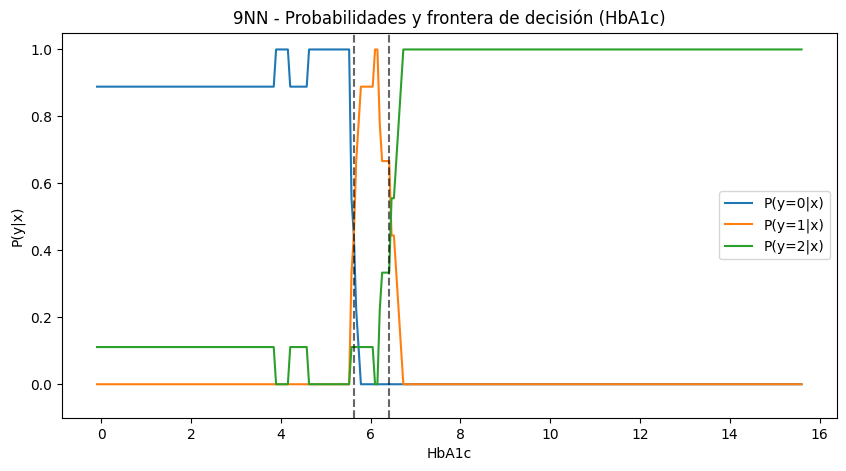

9NN (HbA1c)
Accuracy: 0.981
Confusion matrix:
 [[19  0  0]
 [ 0  8  0]
 [ 1  0 25]]
Macro-F1: 0.985


In [ ]:
#1. implemento KNN
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distances(self, X):
        # Distancia Euclídea: (n_test, n_train)
        dists = np.sqrt(((X[:, np.newaxis, :] - self.X_train[np.newaxis, :, :])**2).sum(axis=2))
        return dists

    def predict(self, X):
        dists = self._compute_distances(X)
        neighbors_idx = np.argsort(dists, axis=1)[:, :self.k]
        neighbors_labels = self.y_train[neighbors_idx]

        # Voto mayoritario
        y_pred = []
        for row in neighbors_labels:
            most_common = Counter(row).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)

    def predict_prob(self, X):
        dists = self._compute_distances(X)
        neighbors_idx = np.argsort(dists, axis=1)[:, :self.k]
        neighbors_labels = self.y_train[neighbors_idx]

        classes = np.unique(self.y_train)
        probs = np.zeros((X.shape[0], len(classes)))

        for i, row in enumerate(neighbors_labels):
            counts = Counter(row)
            for c in classes:
                probs[i, c] = counts[c] / self.k
        return probs

#2. entreno el clasificador 9NN utilizando solo la catacterística HbA1c
X_hba1c_train = X_train[['HbA1c']].values
X_hba1c_test  = X_test[['HbA1c']].values
y_train_array = y_train.values
y_test_array  = y_test.values

knn_hba1c = KNN(k=9)
knn_hba1c.fit(X_hba1c_train, y_train_array)

#3. grafico P(y|x) y frontera de decision
# Grilla en HbA1c
x_min, x_max = X_hba1c_train.min() - 1, X_hba1c_train.max() + 1
xx = np.linspace(x_min, x_max, 300).reshape(-1,1)

# Probabilidades
probs = knn_hba1c.predict_prob(xx)
y_pred_grid = np.argmax(probs, axis=1)

plt.figure(figsize=(10,5))

# Curvas P(y|x)
for c in np.unique(y_train_array):
    plt.plot(xx, probs[:,c], label=f"P(y={c}|x)")

# Fronteras de decisión (donde cambia la clase más probable)
boundaries = np.where(np.diff(y_pred_grid) != 0)[0]
for b in boundaries:
    plt.axvline(xx[b], color='k', linestyle='--', alpha=0.6)

plt.ylim(-0.1, 1.05)
plt.title("9NN - Probabilidades y frontera de decisión (HbA1c)")
plt.xlabel("HbA1c")
plt.ylabel("P(y|x)")
plt.legend()
plt.show()


#4. métricas
print("9NN (HbA1c)")
y_pred_hba1c = knn_hba1c.predict(X_hba1c_test)
print("Accuracy:", round(accuracy_score(y_test_array, y_pred_hba1c),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, y_pred_hba1c))
print("Macro-F1:", round(f1_score(y_test_array, y_pred_hba1c, average='macro'),3))


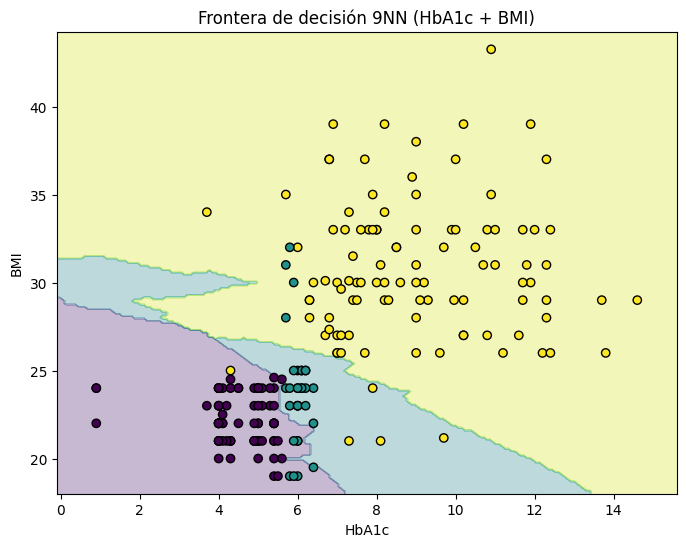

9NN (HbA1c + BMI)
Accuracy: 0.925
Confusion matrix:
 [[19  0  0]
 [ 1  6  1]
 [ 1  1 24]]
Macro-F1: 0.897


In [ ]:
#5. repito 2. y 4. sumando BMI como característica

#5.2. entreno el clasificador 9NN utilizando solo la catacterística HbA1c
X_2d_train = X_train[['HbA1c', 'BMI']].values
X_2d_test  = X_test[['HbA1c', 'BMI']].values
y_train_array = y_train.values
y_test_array  = y_test.values

knn_2d = KNN(k=9)
knn_2d.fit(X_2d_train, y_train_array)

#5.3. grafico P(y|x) y frontera de decision
x_min, x_max = X_2d_train[:, 0].min() - 1, X_2d_train[:, 0].max() + 1
y_min, y_max = X_2d_train[:, 1].min() - 1, X_2d_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predicciones en la grilla
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_2d.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_2d_train[:,0], X_2d_train[:,1], c=y_train_array, edgecolor='k', cmap='viridis')
plt.title("Frontera de decisión 9NN (HbA1c + BMI)")
plt.xlabel("HbA1c")
plt.ylabel("BMI")
plt.show()

#5.4. métricas
print("9NN (HbA1c + BMI)")
y_pred_2d = knn_2d.predict(X_2d_test)
print("Accuracy:", round(accuracy_score(y_test_array, y_pred_2d),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, y_pred_2d))
print("Macro-F1:", round(f1_score(y_test_array, y_pred_2d, average='macro'),3))



In [ ]:
#6. repito 2. y 4. sumando todas las características

#6.2. entreno el clasificador 9NN utilizando solo la catacterística HbA1c
X_all_train = X_train.values
X_all_test  = X_test.values
y_train_array = y_train.values
y_test_array  = y_test.values

knn_all = KNN(k=9)
knn_all.fit(X_all_train, y_train_array)


#6.4. métricas
print("9NN (todas las características)")
y_pred_all = knn_all.predict(X_all_test)
print("Accuracy:", round(accuracy_score(y_test_array, y_pred_all),3))
print("Confusion matrix:\n", confusion_matrix(y_test_array, y_pred_all))
print("Macro-F1:", round(f1_score(y_test_array, y_pred_all, average='macro'),3))

9NN (todas las características)
Accuracy: 0.736
Confusion matrix:
 [[14  2  3]
 [ 5  3  0]
 [ 4  0 22]]
Macro-F1: 0.664


---
Anexo
---

Tuve un error pero me pareció suepr interesante entonces lo dejo, se obtienen las mismas fronteras tambien con probabilidad! muy bueno

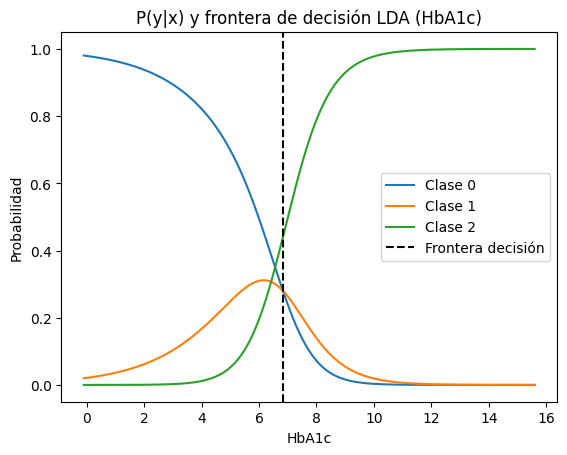

Fronteras de decisión LDA:
x = 6.822


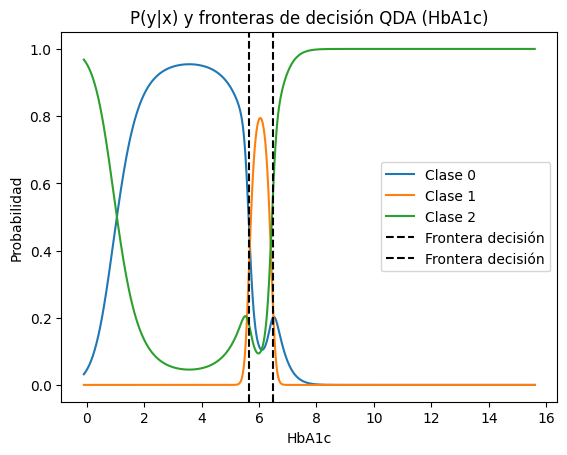

Fronteras de decisión QDA:
x = 5.658
x = 6.476


In [ ]:
#2. entreno el clasificador solo con la columna HbA1c, ajusto las filas de y
X_hba1c_train = X_train[['HbA1c']].values
y_train_array = y_train.values

# entrenamiento LDA
lda_anexo = LDA_QDA(LDA=True)
lda_anexo.fit(X_hba1c_train, y_train_array)
y_pred_lda_train_anexo = lda_anexo.predict(X_hba1c_train)

# entrenamiento QDA
qda_anexo = LDA_QDA(LDA=False)
qda_anexo.fit(X_hba1c_train, y_train_array)
y_pred_qda_train_anexo = qda_anexo.predict(X_hba1c_train)


#3. grafico la probabilidad y frontera de decisión
x_vals_anexo = np.linspace(X_hba1c_train.min()-1, X_hba1c_train.max()+1, 500).reshape(-1, 1)

# LDA: Linear Discriminant Analysis
probs_lda_anexo = lda.predict_prob(x_vals_anexo)
plt.figure()
for i, c in enumerate(lda.classes_):
    plt.plot(x_vals_anexo, probs_lda_anexo[:, i], label=f'Clase {c}')
# frontera de decisión para LDA
decision_lda_anexo = x_vals_anexo[np.argwhere(np.diff(np.sign(probs_lda_anexo[:,0] - probs_lda_anexo[:,1]))).flatten()]
for d in decision_lda_anexo:
    plt.axvline(d, color="k", linestyle="--", label="Frontera decisión")
plt.title("P(y|x) y frontera de decisión LDA (HbA1c)")
plt.xlabel("HbA1c")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

print("Fronteras de decisión LDA:")
for d in decision_lda_anexo:
    print(f"x = {d[0]:.3f}")

# QDA: Quadratic Discriminant Analysis
probs_qda_anexo = qda_anexo.predict_prob(x_vals)
plt.figure()
for i, c in enumerate(qda.classes_):
    plt.plot(x_vals_anexo, probs_qda_anexo[:, i], label=f'Clase {c}')
# frontera de decisión para QDA
decision_qda_anexo = x_vals_anexo[np.argwhere(np.diff(np.sign(probs_qda_anexo[:,0] - probs_qda_anexo[:,1]))).flatten()]
for d in decision_qda_anexo:
    plt.axvline(d, color="k", linestyle="--", label="Frontera decisión")
plt.title("P(y|x) y fronteras de decisión QDA (HbA1c)")
plt.xlabel("HbA1c")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

print("Fronteras de decisión QDA:")
for d in decision_qda_anexo:
    print(f"x = {d[0]:.3f}")
